In [26]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from utils import Data_Gen
from utils import Net
from utils import corpus_generator
from utils import shuffle_tags
from utils import plt_data_2d

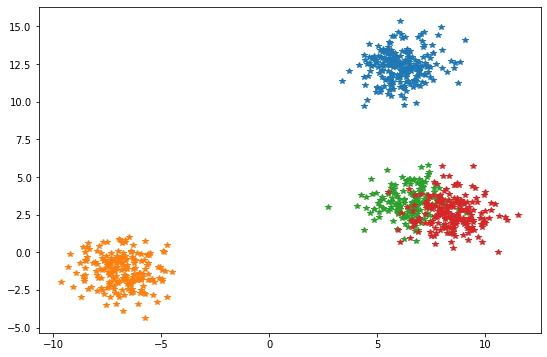

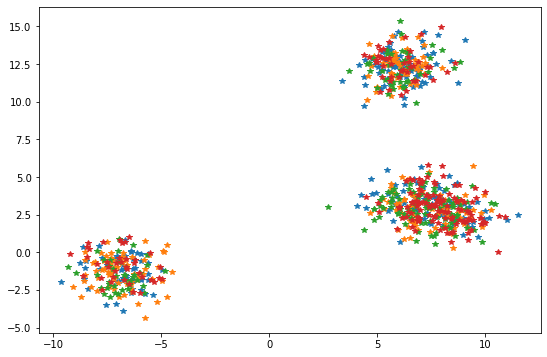

In [22]:
# PARAMETERS
# Corpus
quant_tag = 4
quant_data = 1000
dimension = 2
test_proportion = 0.2
gap=6
learning_rate = 0.001

# Shuffled tags
shuffle_probability = 0.9

# Training
num_epochs = 250
batch_size = 10

# =================================

# Data generation
training, training_tags, test, tags = corpus_generator(quant_tag, quant_data, dimension, test_proportion, gap)


new_ttags = shuffle_tags(training_tags, proba=shuffle_probability)

real_train_set = Data_Gen(training, training_tags)
shuffled_train_set = Data_Gen(training,new_ttags)
test_set = Data_Gen(test,tags)

train_loader = torch.utils.data.DataLoader(shuffled_train_set, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_set, shuffle=False)

plt_data_2d(training, training_tags)
plt_data_2d(training,new_ttags)


In [23]:
#Training
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

model = Net(num_classes=quant_tag, num_input=dimension).to(device)

# Loss
criterion = nn.CrossEntropyLoss()

# Optimizer
#optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)


In [24]:
# Entrenamiento del modelo
loss_out = []
# Train the model
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (points, labels) in enumerate(train_loader):
        points = points.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(points)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i + 1) % 10 == 0:
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                  .format(epoch + 1, num_epochs, i + 1, total_step, loss.item()))
            loss_out.append(loss.item())

Epoch [1/250], Step [10/80], Loss: 1.6325
Epoch [1/250], Step [20/80], Loss: 1.7555
Epoch [1/250], Step [30/80], Loss: 1.5811
Epoch [1/250], Step [40/80], Loss: 1.4081
Epoch [1/250], Step [50/80], Loss: 1.4191
Epoch [1/250], Step [60/80], Loss: 1.9145
Epoch [1/250], Step [70/80], Loss: 1.3842
Epoch [1/250], Step [80/80], Loss: 1.6456
Epoch [2/250], Step [10/80], Loss: 1.4595
Epoch [2/250], Step [20/80], Loss: 1.5296
Epoch [2/250], Step [30/80], Loss: 1.4161
Epoch [2/250], Step [40/80], Loss: 1.3762
Epoch [2/250], Step [50/80], Loss: 1.4378
Epoch [2/250], Step [60/80], Loss: 1.3691
Epoch [2/250], Step [70/80], Loss: 1.4263
Epoch [2/250], Step [80/80], Loss: 1.8111
Epoch [3/250], Step [10/80], Loss: 1.4943
Epoch [3/250], Step [20/80], Loss: 1.7563
Epoch [3/250], Step [30/80], Loss: 1.3890
Epoch [3/250], Step [40/80], Loss: 1.1814
Epoch [3/250], Step [50/80], Loss: 1.6924
Epoch [3/250], Step [60/80], Loss: 1.4773
Epoch [3/250], Step [70/80], Loss: 1.4017
Epoch [3/250], Step [80/80], Loss:

Epoch [25/250], Step [50/80], Loss: 1.4016
Epoch [25/250], Step [60/80], Loss: 1.3512
Epoch [25/250], Step [70/80], Loss: 1.3568
Epoch [25/250], Step [80/80], Loss: 1.3910
Epoch [26/250], Step [10/80], Loss: 1.3979
Epoch [26/250], Step [20/80], Loss: 1.4286
Epoch [26/250], Step [30/80], Loss: 1.3441
Epoch [26/250], Step [40/80], Loss: 1.4141
Epoch [26/250], Step [50/80], Loss: 1.4028
Epoch [26/250], Step [60/80], Loss: 1.3571
Epoch [26/250], Step [70/80], Loss: 1.3928
Epoch [26/250], Step [80/80], Loss: 1.3761
Epoch [27/250], Step [10/80], Loss: 1.4905
Epoch [27/250], Step [20/80], Loss: 1.2510
Epoch [27/250], Step [30/80], Loss: 1.2846
Epoch [27/250], Step [40/80], Loss: 1.3056
Epoch [27/250], Step [50/80], Loss: 1.4002
Epoch [27/250], Step [60/80], Loss: 1.2789
Epoch [27/250], Step [70/80], Loss: 1.4147
Epoch [27/250], Step [80/80], Loss: 1.4231
Epoch [28/250], Step [10/80], Loss: 1.3132
Epoch [28/250], Step [20/80], Loss: 1.3868
Epoch [28/250], Step [30/80], Loss: 1.4902
Epoch [28/2

Epoch [49/250], Step [50/80], Loss: 1.2764
Epoch [49/250], Step [60/80], Loss: 1.2741
Epoch [49/250], Step [70/80], Loss: 1.5085
Epoch [49/250], Step [80/80], Loss: 1.3580
Epoch [50/250], Step [10/80], Loss: 1.3098
Epoch [50/250], Step [20/80], Loss: 1.4725
Epoch [50/250], Step [30/80], Loss: 1.2618
Epoch [50/250], Step [40/80], Loss: 1.3363
Epoch [50/250], Step [50/80], Loss: 1.3759
Epoch [50/250], Step [60/80], Loss: 1.3374
Epoch [50/250], Step [70/80], Loss: 1.4104
Epoch [50/250], Step [80/80], Loss: 1.3228
Epoch [51/250], Step [10/80], Loss: 1.3754
Epoch [51/250], Step [20/80], Loss: 1.3534
Epoch [51/250], Step [30/80], Loss: 1.3267
Epoch [51/250], Step [40/80], Loss: 1.3765
Epoch [51/250], Step [50/80], Loss: 1.2682
Epoch [51/250], Step [60/80], Loss: 1.3571
Epoch [51/250], Step [70/80], Loss: 1.2633
Epoch [51/250], Step [80/80], Loss: 1.3980
Epoch [52/250], Step [10/80], Loss: 1.3555
Epoch [52/250], Step [20/80], Loss: 1.2897
Epoch [52/250], Step [30/80], Loss: 1.2007
Epoch [52/2

Epoch [73/250], Step [50/80], Loss: 1.2414
Epoch [73/250], Step [60/80], Loss: 1.2971
Epoch [73/250], Step [70/80], Loss: 1.3636
Epoch [73/250], Step [80/80], Loss: 1.3066
Epoch [74/250], Step [10/80], Loss: 1.3449
Epoch [74/250], Step [20/80], Loss: 1.4176
Epoch [74/250], Step [30/80], Loss: 1.3446
Epoch [74/250], Step [40/80], Loss: 1.4528
Epoch [74/250], Step [50/80], Loss: 1.4169
Epoch [74/250], Step [60/80], Loss: 1.3905
Epoch [74/250], Step [70/80], Loss: 1.3986
Epoch [74/250], Step [80/80], Loss: 1.4525
Epoch [75/250], Step [10/80], Loss: 1.3731
Epoch [75/250], Step [20/80], Loss: 1.3788
Epoch [75/250], Step [30/80], Loss: 1.5298
Epoch [75/250], Step [40/80], Loss: 1.3798
Epoch [75/250], Step [50/80], Loss: 1.2726
Epoch [75/250], Step [60/80], Loss: 1.4453
Epoch [75/250], Step [70/80], Loss: 1.4654
Epoch [75/250], Step [80/80], Loss: 1.3911
Epoch [76/250], Step [10/80], Loss: 1.3927
Epoch [76/250], Step [20/80], Loss: 1.3639
Epoch [76/250], Step [30/80], Loss: 1.4235
Epoch [76/2

Epoch [97/250], Step [60/80], Loss: 1.4093
Epoch [97/250], Step [70/80], Loss: 1.4206
Epoch [97/250], Step [80/80], Loss: 1.2498
Epoch [98/250], Step [10/80], Loss: 1.5214
Epoch [98/250], Step [20/80], Loss: 1.3536
Epoch [98/250], Step [30/80], Loss: 1.2831
Epoch [98/250], Step [40/80], Loss: 1.4060
Epoch [98/250], Step [50/80], Loss: 1.4677
Epoch [98/250], Step [60/80], Loss: 1.3531
Epoch [98/250], Step [70/80], Loss: 1.3976
Epoch [98/250], Step [80/80], Loss: 1.3125
Epoch [99/250], Step [10/80], Loss: 1.5192
Epoch [99/250], Step [20/80], Loss: 1.3604
Epoch [99/250], Step [30/80], Loss: 1.4426
Epoch [99/250], Step [40/80], Loss: 1.3429
Epoch [99/250], Step [50/80], Loss: 1.3830
Epoch [99/250], Step [60/80], Loss: 1.2403
Epoch [99/250], Step [70/80], Loss: 1.3060
Epoch [99/250], Step [80/80], Loss: 1.4120
Epoch [100/250], Step [10/80], Loss: 1.3680
Epoch [100/250], Step [20/80], Loss: 1.3682
Epoch [100/250], Step [30/80], Loss: 1.4569
Epoch [100/250], Step [40/80], Loss: 1.4736
Epoch [

Epoch [121/250], Step [10/80], Loss: 1.4030
Epoch [121/250], Step [20/80], Loss: 1.3370
Epoch [121/250], Step [30/80], Loss: 1.2639
Epoch [121/250], Step [40/80], Loss: 1.2595
Epoch [121/250], Step [50/80], Loss: 1.3614
Epoch [121/250], Step [60/80], Loss: 1.4232
Epoch [121/250], Step [70/80], Loss: 1.5572
Epoch [121/250], Step [80/80], Loss: 1.4327
Epoch [122/250], Step [10/80], Loss: 1.3196
Epoch [122/250], Step [20/80], Loss: 1.4190
Epoch [122/250], Step [30/80], Loss: 1.4374
Epoch [122/250], Step [40/80], Loss: 1.3550
Epoch [122/250], Step [50/80], Loss: 1.3218
Epoch [122/250], Step [60/80], Loss: 1.3297
Epoch [122/250], Step [70/80], Loss: 1.3460
Epoch [122/250], Step [80/80], Loss: 1.3942
Epoch [123/250], Step [10/80], Loss: 1.2764
Epoch [123/250], Step [20/80], Loss: 1.3534
Epoch [123/250], Step [30/80], Loss: 1.3629
Epoch [123/250], Step [40/80], Loss: 1.3927
Epoch [123/250], Step [50/80], Loss: 1.3855
Epoch [123/250], Step [60/80], Loss: 1.3499
Epoch [123/250], Step [70/80], L

Epoch [144/250], Step [70/80], Loss: 1.3816
Epoch [144/250], Step [80/80], Loss: 1.4055
Epoch [145/250], Step [10/80], Loss: 1.3948
Epoch [145/250], Step [20/80], Loss: 1.4093
Epoch [145/250], Step [30/80], Loss: 1.2874
Epoch [145/250], Step [40/80], Loss: 1.4715
Epoch [145/250], Step [50/80], Loss: 1.3148
Epoch [145/250], Step [60/80], Loss: 1.2310
Epoch [145/250], Step [70/80], Loss: 1.2674
Epoch [145/250], Step [80/80], Loss: 1.3711
Epoch [146/250], Step [10/80], Loss: 1.4118
Epoch [146/250], Step [20/80], Loss: 1.4579
Epoch [146/250], Step [30/80], Loss: 1.3426
Epoch [146/250], Step [40/80], Loss: 1.2438
Epoch [146/250], Step [50/80], Loss: 1.3620
Epoch [146/250], Step [60/80], Loss: 1.4575
Epoch [146/250], Step [70/80], Loss: 1.3478
Epoch [146/250], Step [80/80], Loss: 1.3219
Epoch [147/250], Step [10/80], Loss: 1.3975
Epoch [147/250], Step [20/80], Loss: 1.4027
Epoch [147/250], Step [30/80], Loss: 1.4441
Epoch [147/250], Step [40/80], Loss: 1.3500
Epoch [147/250], Step [50/80], L

Epoch [168/250], Step [30/80], Loss: 1.4489
Epoch [168/250], Step [40/80], Loss: 1.2651
Epoch [168/250], Step [50/80], Loss: 1.3601
Epoch [168/250], Step [60/80], Loss: 1.4392
Epoch [168/250], Step [70/80], Loss: 1.4153
Epoch [168/250], Step [80/80], Loss: 1.3909
Epoch [169/250], Step [10/80], Loss: 1.3783
Epoch [169/250], Step [20/80], Loss: 1.4914
Epoch [169/250], Step [30/80], Loss: 1.4442
Epoch [169/250], Step [40/80], Loss: 1.3522
Epoch [169/250], Step [50/80], Loss: 1.3233
Epoch [169/250], Step [60/80], Loss: 1.4099
Epoch [169/250], Step [70/80], Loss: 1.5011
Epoch [169/250], Step [80/80], Loss: 1.4225
Epoch [170/250], Step [10/80], Loss: 1.3813
Epoch [170/250], Step [20/80], Loss: 1.3491
Epoch [170/250], Step [30/80], Loss: 1.3482
Epoch [170/250], Step [40/80], Loss: 1.3566
Epoch [170/250], Step [50/80], Loss: 1.4141
Epoch [170/250], Step [60/80], Loss: 1.4232
Epoch [170/250], Step [70/80], Loss: 1.4185
Epoch [170/250], Step [80/80], Loss: 1.3406
Epoch [171/250], Step [10/80], L

Epoch [191/250], Step [60/80], Loss: 1.4369
Epoch [191/250], Step [70/80], Loss: 1.2723
Epoch [191/250], Step [80/80], Loss: 1.3672
Epoch [192/250], Step [10/80], Loss: 1.3636
Epoch [192/250], Step [20/80], Loss: 1.3659
Epoch [192/250], Step [30/80], Loss: 1.3621
Epoch [192/250], Step [40/80], Loss: 1.4026
Epoch [192/250], Step [50/80], Loss: 1.3740
Epoch [192/250], Step [60/80], Loss: 1.3726
Epoch [192/250], Step [70/80], Loss: 1.4339
Epoch [192/250], Step [80/80], Loss: 1.3697
Epoch [193/250], Step [10/80], Loss: 1.4264
Epoch [193/250], Step [20/80], Loss: 1.4286
Epoch [193/250], Step [30/80], Loss: 1.3701
Epoch [193/250], Step [40/80], Loss: 1.4896
Epoch [193/250], Step [50/80], Loss: 1.5080
Epoch [193/250], Step [60/80], Loss: 1.3240
Epoch [193/250], Step [70/80], Loss: 1.4942
Epoch [193/250], Step [80/80], Loss: 1.3720
Epoch [194/250], Step [10/80], Loss: 1.4301
Epoch [194/250], Step [20/80], Loss: 1.3237
Epoch [194/250], Step [30/80], Loss: 1.3952
Epoch [194/250], Step [40/80], L

Epoch [215/250], Step [20/80], Loss: 1.3397
Epoch [215/250], Step [30/80], Loss: 1.2797
Epoch [215/250], Step [40/80], Loss: 1.3842
Epoch [215/250], Step [50/80], Loss: 1.3168
Epoch [215/250], Step [60/80], Loss: 1.3588
Epoch [215/250], Step [70/80], Loss: 1.2713
Epoch [215/250], Step [80/80], Loss: 1.2464
Epoch [216/250], Step [10/80], Loss: 1.4524
Epoch [216/250], Step [20/80], Loss: 1.3901
Epoch [216/250], Step [30/80], Loss: 1.3513
Epoch [216/250], Step [40/80], Loss: 1.4067
Epoch [216/250], Step [50/80], Loss: 1.3174
Epoch [216/250], Step [60/80], Loss: 1.2362
Epoch [216/250], Step [70/80], Loss: 1.3479
Epoch [216/250], Step [80/80], Loss: 1.2597
Epoch [217/250], Step [10/80], Loss: 1.2563
Epoch [217/250], Step [20/80], Loss: 1.3821
Epoch [217/250], Step [30/80], Loss: 1.4107
Epoch [217/250], Step [40/80], Loss: 1.4044
Epoch [217/250], Step [50/80], Loss: 1.4256
Epoch [217/250], Step [60/80], Loss: 1.3460
Epoch [217/250], Step [70/80], Loss: 1.3773
Epoch [217/250], Step [80/80], L

Epoch [238/250], Step [60/80], Loss: 1.4653
Epoch [238/250], Step [70/80], Loss: 1.3874
Epoch [238/250], Step [80/80], Loss: 1.3131
Epoch [239/250], Step [10/80], Loss: 1.3888
Epoch [239/250], Step [20/80], Loss: 1.3350
Epoch [239/250], Step [30/80], Loss: 1.2732
Epoch [239/250], Step [40/80], Loss: 1.4286
Epoch [239/250], Step [50/80], Loss: 1.3063
Epoch [239/250], Step [60/80], Loss: 1.5430
Epoch [239/250], Step [70/80], Loss: 1.4658
Epoch [239/250], Step [80/80], Loss: 1.2324
Epoch [240/250], Step [10/80], Loss: 1.3464
Epoch [240/250], Step [20/80], Loss: 1.3800
Epoch [240/250], Step [30/80], Loss: 1.4008
Epoch [240/250], Step [40/80], Loss: 1.3340
Epoch [240/250], Step [50/80], Loss: 1.4911
Epoch [240/250], Step [60/80], Loss: 1.3338
Epoch [240/250], Step [70/80], Loss: 1.4216
Epoch [240/250], Step [80/80], Loss: 1.3968
Epoch [241/250], Step [10/80], Loss: 1.2785
Epoch [241/250], Step [20/80], Loss: 1.5279
Epoch [241/250], Step [30/80], Loss: 1.4304
Epoch [241/250], Step [40/80], L

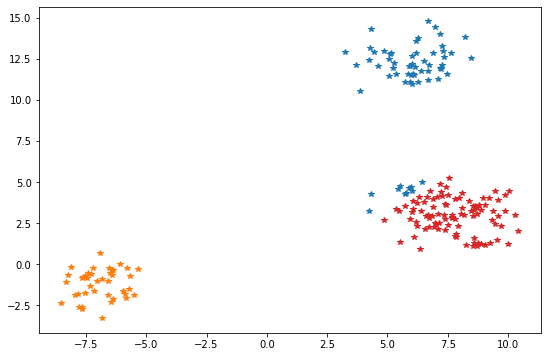

In [25]:
# Test the model
net_output = []
real_label = []
model.eval()  # eval mode (batchnorm uses moving mean/variance instead of mini-batch mean/variance)
with torch.no_grad():
    correct = 0
    total = 0
    for points, labels in test_loader:
        points = points.to(device)
        real_label.append(labels)
        outputs = model(points)
        _, predicted = torch.max(outputs.data, 1)
        net_output.append(predicted.to('cpu'))
        #total += labels.size(0)
        #correct += (predicted == labels).sum().item()
    net_output = torch.Tensor(net_output).long()
    real_label = torch.Tensor(real_label).long()
    #print('Test Accuracy of the model on the 10000 test images: {} %'.format(100 * correct / total))

plt_data_2d(test,net_output)
plt.show()

In [49]:
(u,s,v) = torch.pca_lowrank(test)

In [50]:
max_dim = 2
proy = torch.matmul(test, v[:, :max_dim])

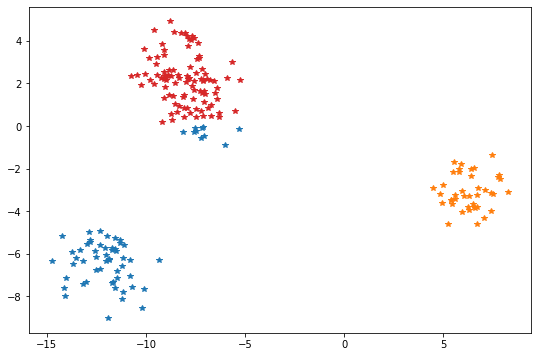

In [52]:
plt_data_2d(proy,net_output)

In [38]:
test

tensor([[-5.8228, -2.0367],
        [-6.9294,  0.6605],
        [ 6.1949, 13.5921],
        [ 7.8063,  3.9675],
        [ 7.6654,  2.8716],
        [ 4.8617, 12.9705],
        [ 6.1564, 11.9685],
        [-6.8178, -3.2708],
        [-7.6094, -0.7806],
        [ 6.5912,  2.9107],
        [ 7.1290,  2.4826],
        [ 8.1808,  3.0046],
        [ 6.0005, 12.6570],
        [-7.5320, -0.7452],
        [ 8.3662,  3.8400],
        [ 6.2097,  2.3412],
        [-5.6907, -0.6899],
        [-7.1868, -0.2324],
        [ 9.8698,  4.2170],
        [ 6.0255,  4.4771],
        [ 6.6587, 11.2058],
        [-6.1012,  0.0330],
        [ 7.1773, 11.9534],
        [ 9.0343,  3.6159],
        [ 7.8580,  1.6410],
        [-6.8292, -0.9260],
        [ 5.0572, 12.5017],
        [10.4075,  1.9925],
        [ 6.1619, 12.8394],
        [ 3.8456, 10.5618],
        [-6.5962, -1.0140],
        [ 5.2159, 11.9296],
        [ 6.7024,  2.8287],
        [ 6.0596, 11.5836],
        [ 5.8504, 11.5418],
        [ 8.7509,  1